In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv("../data/raw/pIC50_chembl.csv")

In [4]:
df.head()

,molregno,canonical_smiles,pref_name,ic50,pIC50,units
0,182268,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,Heparanase,2500.0,5.60,nM
1,182855,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,Heparanase,9000.0,5.05,nM
2,252199,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,Palmitoyl-CoA oxidase,4000.0,5.40,nM
3,253534,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,Palmitoyl-CoA oxidase,17000.0,4.77,nM
4,253199,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4cccc(-c5ccc...,Palmitoyl-CoA oxidase,180.0,6.75,nM


In [5]:
ligand_counts_full = df['pref_name'].value_counts()

In [6]:
df2 = pd.read_csv("../data/raw_filter_20/pIC50_chembl_filter_2.csv")

In [7]:
ligand_counts_filtered = df2['pref_name'].value_counts()

In [11]:
target_mapping = pd.read_csv('target_mapping.csv')

In [12]:
import pandas as pd
target_map = target_mapping[['pref_name','target_type']].drop_duplicates()

In [13]:
target_map.head()

,pref_name,target_type
0,Heparanase,SINGLE PROTEIN
1,Palmitoyl-CoA oxidase,SINGLE PROTEIN
2,Cytochrome P450 1A2,SINGLE PROTEIN
3,Cytochrome P450 3A4,SINGLE PROTEIN
4,Cytochrome P450 2C9,SINGLE PROTEIN


In [14]:
target_types = target_map['target_type'].unique()

# 输出结果
print("所有 target_type 类别：")
print(target_types)

所有 target_type 类别：
['SINGLE PROTEIN' 'PROTEIN COMPLEX GROUP' 'SELECTIVITY GROUP' 'ORGANISM'
 'CELL-LINE' 'ADMET' 'UNCHECKED' 'PROTEIN FAMILY' 'PROTEIN COMPLEX'
 'NON-MOLECULAR' 'UNKNOWN' 'NUCLEIC-ACID' 'SUBCELLULAR' 'SMALL MOLECULE'
 'PROTEIN-PROTEIN INTERACTION' 'CHIMERIC PROTEIN' 'TISSUE' 'NO TARGET'
 'PROTEIN NUCLEIC-ACID COMPLEX' 'MACROMOLECULE']


In [15]:
target_filters = ["NO TARGET", "UNCHECKED", "ADMET", "UNKNOWN"]  # 注意大小写匹配

# 筛选符合条件的行
filtered_df = target_map[target_map['target_type'].isin(target_filters)]

# 提取 pref_name 列（并去重，可选）
result = filtered_df['pref_name'].drop_duplicates().reset_index(drop=True)

# 输出结果
print("符合条件的 pref_name：")
print(result)

符合条件的 pref_name：
0                            ADMET
1                        Unchecked
2        AF2 neuropeptide receptor
3                 Sigma 2 receptor
4       Molecular identity unknown
5    Monoclonal antibody (mAb) 3E7
6      Radical scavenging activity
7               No relevant target
Name: pref_name, dtype: object


In [31]:
# 保存映射表
target_map.to_csv('target_mapping.csv', index=False)

# 关闭数据库连接
conn.close()

In [16]:
df_with_types = df.merge(target_map[['pref_name', 'target_type']],
                         left_on='pref_name', right_on='pref_name',
                         how='left')

In [17]:
df_with_types.head()

,molregno,canonical_smiles,pref_name,ic50,pIC50,units,target_type
0,182268,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,Heparanase,2500.0,5.60,nM,SINGLE PROTEIN
1,182855,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,Heparanase,9000.0,5.05,nM,SINGLE PROTEIN
2,252199,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,Palmitoyl-CoA oxidase,4000.0,5.40,nM,SINGLE PROTEIN
3,253534,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,Palmitoyl-CoA oxidase,17000.0,4.77,nM,SINGLE PROTEIN
4,253199,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4cccc(-c5ccc...,Palmitoyl-CoA oxidase,180.0,6.75,nM,SINGLE PROTEIN


In [18]:
df2_with_types = df2.merge(target_map[['pref_name', 'target_type']],
                         left_on='pref_name', right_on='pref_name',
                         how='left')

Selected target_types for visualization: ['SINGLE PROTEIN', 'CELL-LINE', 'ORGANISM', 'PROTEIN COMPLEX', 'PROTEIN FAMILY']


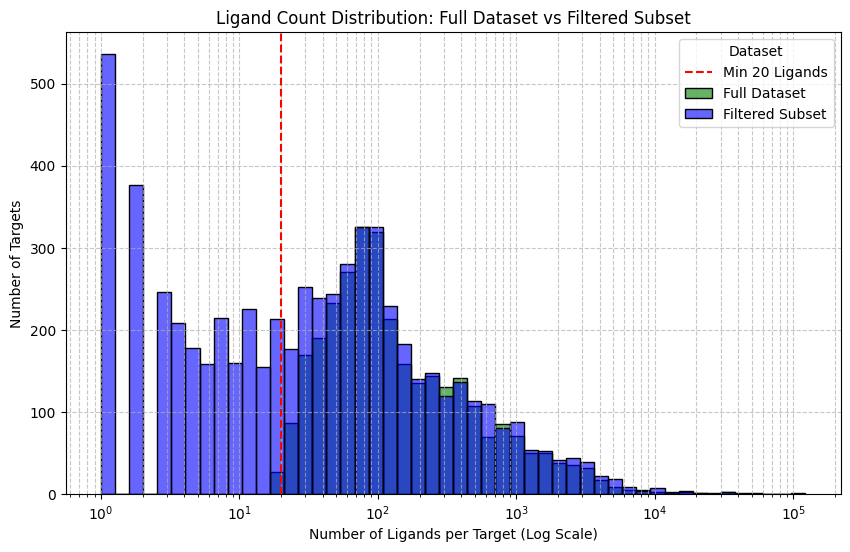

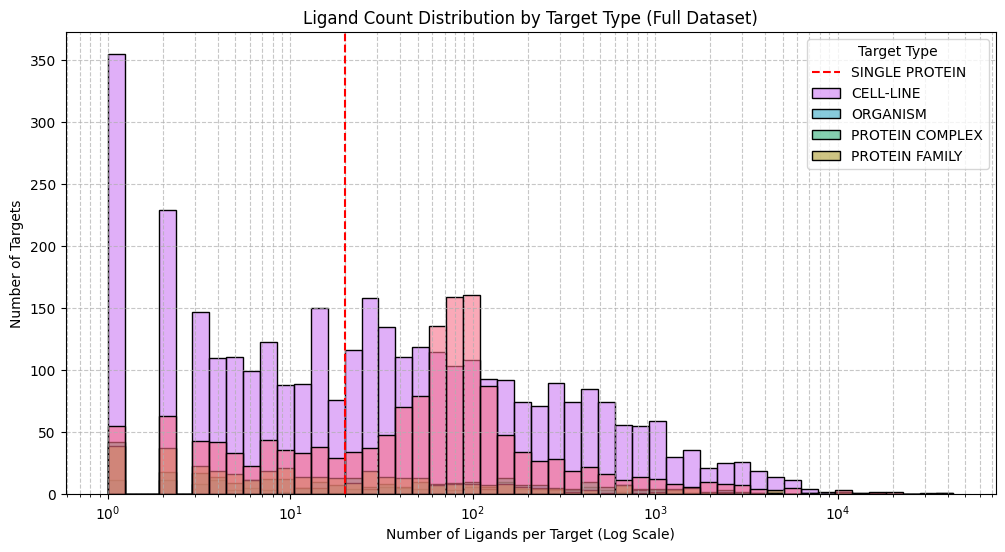

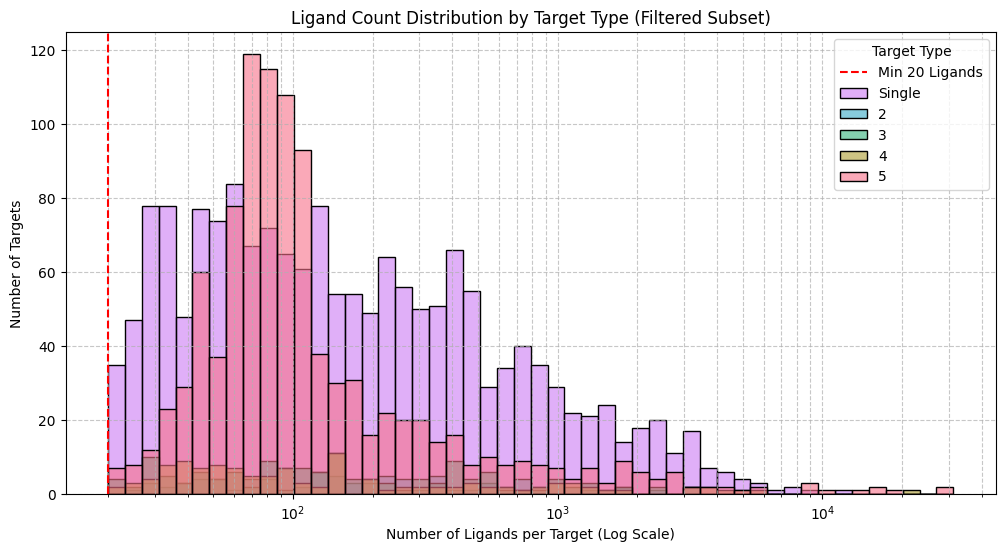

In [19]:
# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
print(f"Selected target_types for visualization: {main_types.tolist()}")

# 计算配体数量
full_counts = df_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
full_counts['dataset'] = 'Full Dataset'
filtered_counts = df2_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts['dataset'] = 'Filtered Subset'

# 合并数据以便整体图
overall_data = pd.concat([full_counts, filtered_counts])

# 图 1: 整体分布（不按 target_type 分组）
plt.figure(figsize=(10, 6))
sns.histplot(data=overall_data, x='ligand_count', hue='dataset', bins=50, log_scale=True, alpha=0.6, palette=['blue', 'green'])
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution: Full Dataset vs Filtered Subset')
plt.legend(title='Dataset', labels=["Min 20 Ligands", "Full Dataset", "Filtered Subset"])
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

# 图 2: Full Dataset 按 target_type 分组
plt.figure(figsize=(12, 6))
full_subset = df_with_types[df_with_types['target_type'].isin(main_types)]
full_counts_by_type = full_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
full_counts_by_type = full_counts_by_type[full_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=full_counts_by_type, x='ligand_count', hue='target_type', bins=50, log_scale=True, alpha=0.6, palette='husl')
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution by Target Type (Full Dataset)')
plt.legend(title='Target Type', labels=main_types)  # 明确指定图例标签
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

# 图 3: Filtered Subset 按 target_type 分组
plt.figure(figsize=(12, 6))
filtered_subset = df2_with_types[df2_with_types['target_type'].isin(main_types)]
filtered_counts_by_type = filtered_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts_by_type = filtered_counts_by_type[filtered_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=filtered_counts_by_type, x='ligand_count', hue='target_type', bins=50, log_scale=True, alpha=0.6, palette='husl')
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution by Target Type (Filtered Subset)')
plt.legend(title='Target Type', labels=["Min 20 Ligands","Single","2", "3", "4", "5"])  # 明确指定图例标签
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

Selected target_types for visualization: ['SINGLE PROTEIN', 'CELL-LINE', 'ORGANISM', 'PROTEIN COMPLEX', 'PROTEIN FAMILY']
Full Dataset targets: 6143
Filtered Subset targets: 3105
Full Dataset compounds: 1846790
Filtered Subset compounds: 1343014
Full Dataset ligand_count range: 1 122409
Filtered Subset ligand_count range: 20 31217


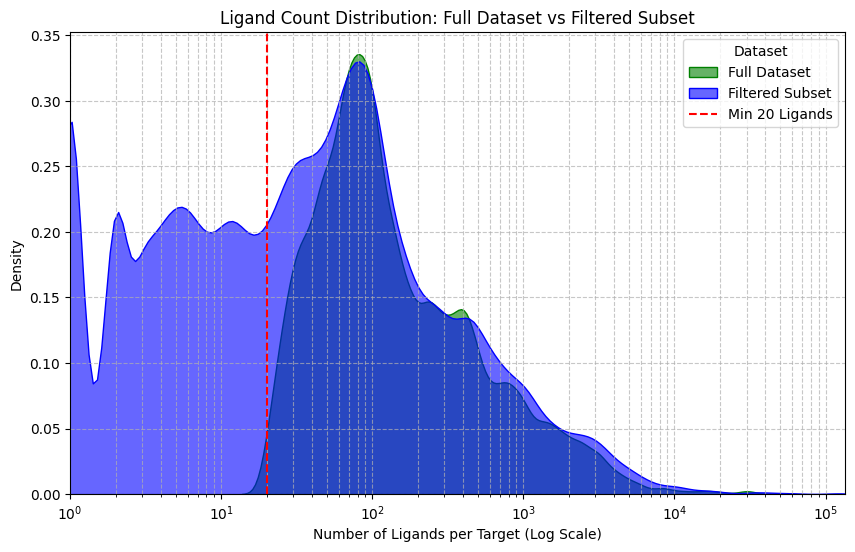

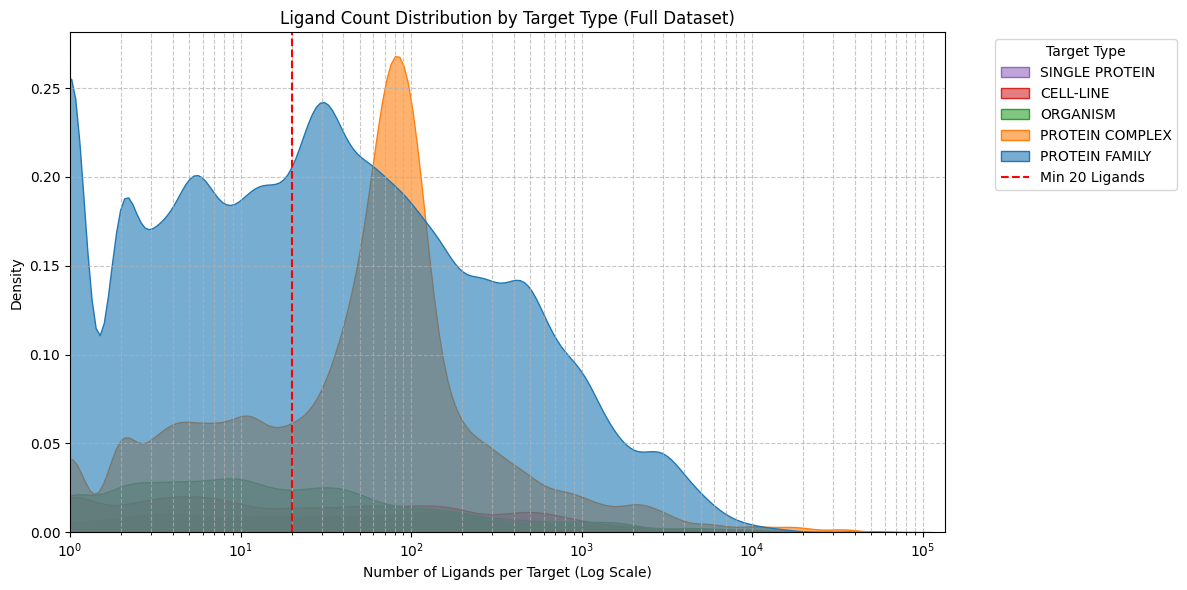

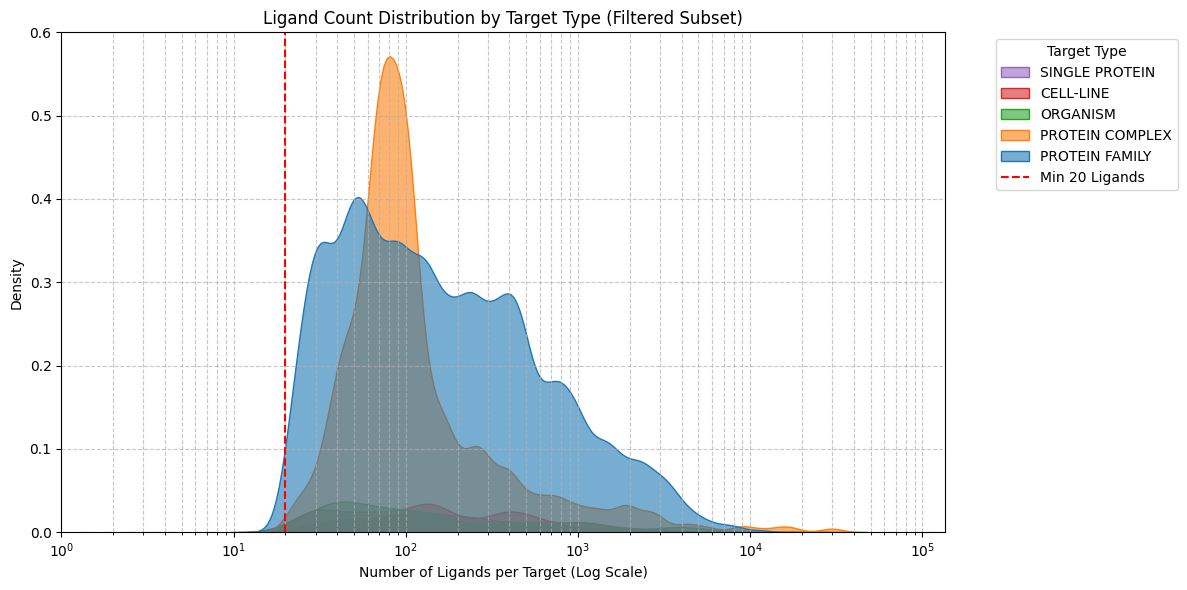

In [70]:
# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
print(f"Selected target_types for visualization: {main_types.tolist()}")

# 自定义高对比度颜色，确保区分
custom_palette = {
    'SINGLE PROTEIN': '#1f77b4',  # 深蓝色
    'CELL-LINE': '#ff7f0e',       # 橙色
    'ORGANISM': '#2ca02c',        # 绿色
    'PROTEIN COMPLEX': '#d62728',  # 红色
    'PROTEIN FAMILY': '#9467bd'    # 紫色
}

# 计算配体数量
full_counts = df_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
full_counts['dataset'] = 'Full Dataset'
filtered_counts = df2_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts['dataset'] = 'Filtered Subset'

# 合并数据以便整体图
overall_data = pd.concat([full_counts, filtered_counts])

# 调试：打印数据范围
print("Full Dataset targets:", full_counts['pref_name'].nunique())
print("Filtered Subset targets:", filtered_counts['pref_name'].nunique())
print("Full Dataset compounds:", full_counts['ligand_count'].sum())
print("Filtered Subset compounds:", filtered_counts['ligand_count'].sum())
print("Full Dataset ligand_count range:", full_counts['ligand_count'].min(), full_counts['ligand_count'].max())
print("Filtered Subset ligand_count range:", filtered_counts['ligand_count'].min(), filtered_counts['ligand_count'].max())

# 计算横坐标范围（对数刻度）
all_ligand_counts = pd.concat([overall_data['ligand_count'], full_counts['ligand_count'], filtered_counts['ligand_count']])
x_min, x_max = all_ligand_counts.min(), all_ligand_counts.max()
x_min_log = max(1, x_min)  # 避免对数刻度下 0 或负值
x_max_log = x_max * 1.1  # 稍微扩大最大值范围

# 图 1: 整体分布（不按 target_type 分组）
plt.figure(figsize=(10, 6))
sns.kdeplot(data=overall_data, x='ligand_count', hue='dataset', hue_order=['Full Dataset', 'Filtered Subset'], log_scale=True, alpha=0.6, palette=['blue', 'green'], fill=True, bw_adjust=0.5)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution: Full Dataset vs Filtered Subset')
plt.legend(title='Dataset', labels=['Full Dataset', 'Filtered Subset', 'Min 20 Ligands'])
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

# 图 2: Full Dataset 按 target_type 分组
plt.figure(figsize=(12, 6))
full_subset = df_with_types[df_with_types['target_type'].isin(main_types)]
full_counts_by_type = full_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
full_counts_by_type = full_counts_by_type[full_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.kdeplot(data=full_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, log_scale=True, alpha=0.6, palette=custom_palette, fill=True, bw_adjust=0.5)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution by Target Type (Full Dataset)')
plt.legend(title='Target Type', labels=main_types.tolist() + ['Min 20 Ligands'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 图 3: Filtered Subset 按 target_type 分组
plt.figure(figsize=(12, 6))
filtered_subset = df2_with_types[df2_with_types['target_type'].isin(main_types)]
filtered_counts_by_type = filtered_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts_by_type = filtered_counts_by_type[filtered_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.kdeplot(data=filtered_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, log_scale=True, alpha=0.6, palette=custom_palette, fill=True, bw_adjust=0.5)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution by Target Type (Filtered Subset)')
plt.legend(title='Target Type', labels=main_types.tolist() + ['Min 20 Ligands'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

Selected target_types for visualization: ['SINGLE PROTEIN', 'CELL-LINE', 'ORGANISM', 'PROTEIN COMPLEX', 'PROTEIN FAMILY']


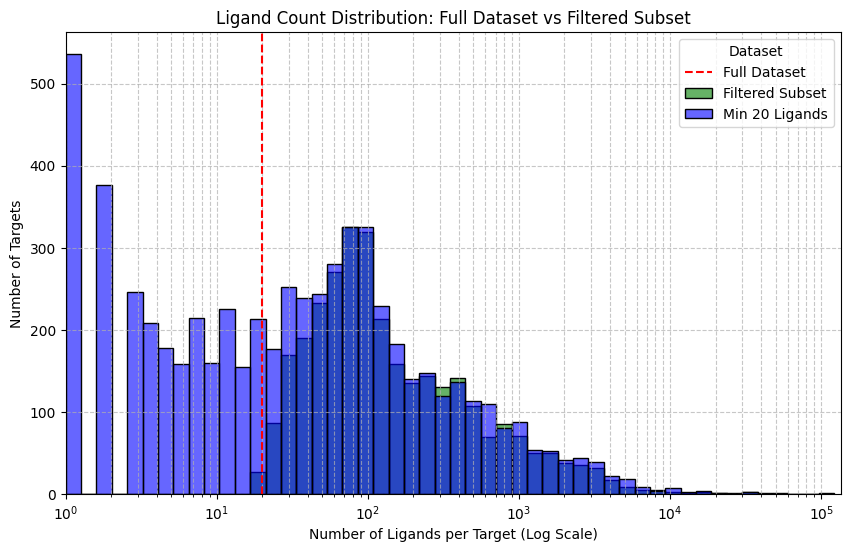

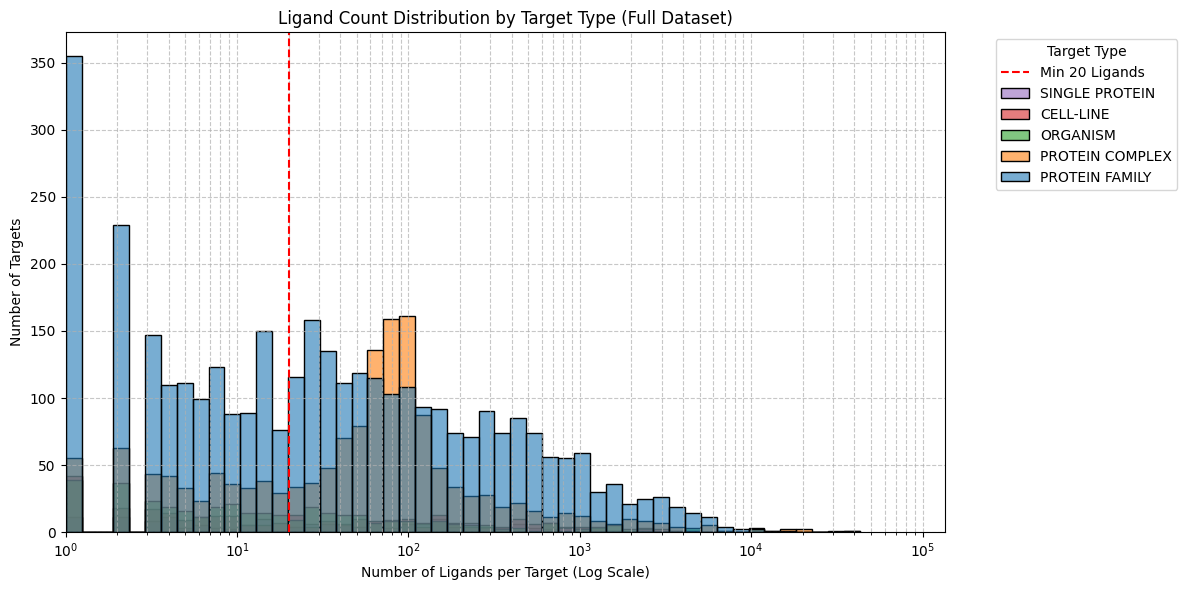

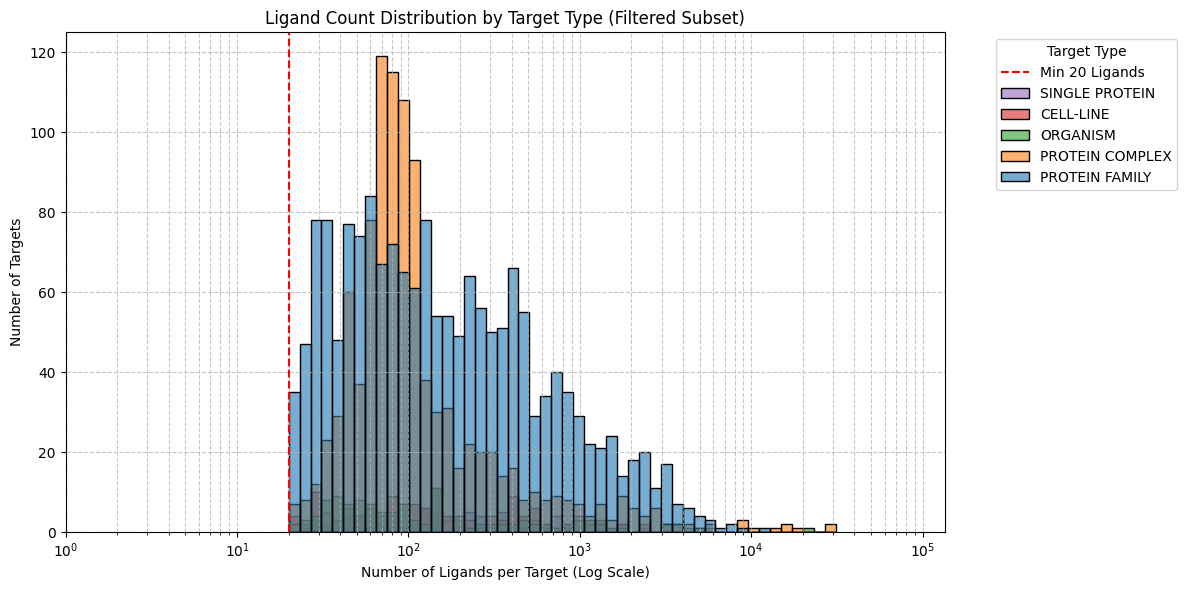

In [111]:
# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
print(f"Selected target_types for visualization: {main_types.tolist()}")

# 自定义高对比度颜色，确保区分
custom_palette = {
    'SINGLE PROTEIN': '#1f77b4',  # 深蓝色
    'CELL-LINE': '#ff7f0e',       # 橙色
    'ORGANISM': '#2ca02c',        # 绿色
    'PROTEIN COMPLEX': '#d62728',  # 红色
    'PROTEIN FAMILY': '#9467bd'    # 紫色
}

# 计算配体数量
full_counts = df_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
full_counts['dataset'] = 'Full Dataset'
filtered_counts = df2_with_types.groupby(['pref_name', 'target_type'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts['dataset'] = 'Filtered Subset'

# 合并数据以便整体图
overall_data = pd.concat([full_counts, filtered_counts])

# 计算横坐标范围（对数刻度）
all_ligand_counts = pd.concat([overall_data['ligand_count'], full_counts['ligand_count'], filtered_counts['ligand_count']])
x_min, x_max = all_ligand_counts.min(), all_ligand_counts.max()
x_min_log = max(1, x_min)  # 避免对数刻度下 0 或负值
x_max_log = x_max * 1.1  # 稍微扩大最大值范围

# 图 1: 整体分布（不按 target_type 分组）
plt.figure(figsize=(10, 6))
sns.histplot(data=overall_data, x='ligand_count', hue='dataset', bins=50, log_scale=True, alpha=0.6, palette=['blue', 'green'])
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution: Full Dataset vs Filtered Subset')
plt.legend(title='Dataset', labels=['Full Dataset', 'Filtered Subset', 'Min 20 Ligands'])
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

# 图 2: Full Dataset 按 target_type 分组
plt.figure(figsize=(12, 6))
full_subset = df_with_types[df_with_types['target_type'].isin(main_types)]
full_counts_by_type = full_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
full_counts_by_type = full_counts_by_type[full_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=full_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, bins=50, log_scale=True, alpha=0.6, palette=custom_palette)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution by Target Type (Full Dataset)')
plt.legend(title='Target Type', labels=['Min 20 Ligands']+main_types.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 图 3: Filtered Subset 按 target_type 分组
plt.figure(figsize=(12, 6))
filtered_subset = df2_with_types[df2_with_types['target_type'].isin(main_types)]
filtered_counts_by_type = filtered_subset.groupby(['target_type', 'pref_name'])['molregno'].count().reset_index(name='ligand_count')
filtered_counts_by_type = filtered_counts_by_type[filtered_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=filtered_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, bins=50, log_scale=True, alpha=0.6, palette=custom_palette)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution by Target Type (Filtered Subset)')
plt.legend(title='Target Type', labels=['Min 20 Ligands']+main_types.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
print("main_types order:", main_types.tolist())
print("Expected colors:", [custom_palette[tt] for tt in main_types])

main_types order: ['SINGLE PROTEIN', 'CELL-LINE', 'ORGANISM', 'PROTEIN COMPLEX', 'PROTEIN FAMILY']
Expected colors: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


Selected target_types for visualization: ['SINGLE PROTEIN', 'CELL-LINE', 'ORGANISM', 'PROTEIN COMPLEX', 'PROTEIN FAMILY']
Full Dataset targets: 6143
Filtered Subset targets: 3105
Full Dataset unique compounds (molregno): 774357
Filtered Subset unique compounds (molregno): 722341
Full Dataset ligand_count range: 1 82888
Filtered Subset ligand_count range: 20 31217


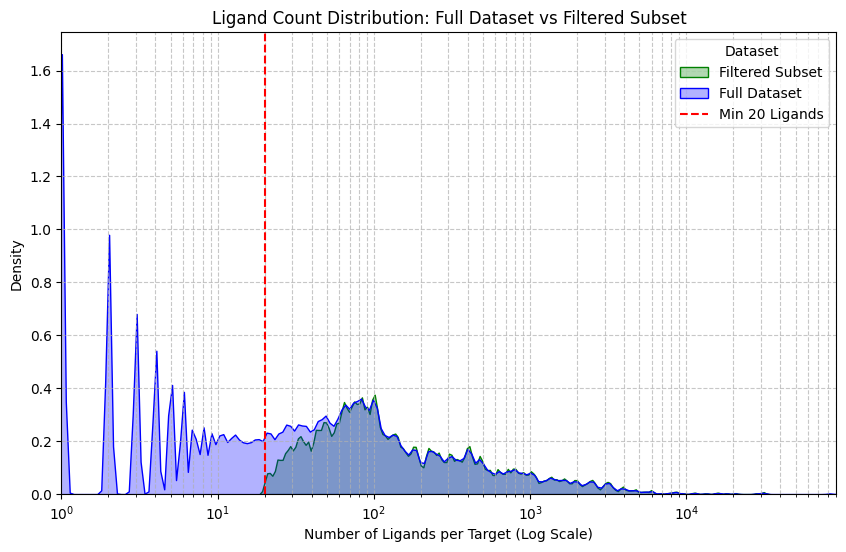

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据框已加载
# df_with_types 和 df2_with_types 已预定义
# 示例：
# df_with_types = pd.DataFrame({
#     'molregno': [...], 'canonical_smiles': [...], 'pref_name': [...],
#     'ic50': [...], 'pIC50': [...], 'units': [...], 'target_type': [...]
# })
# df2_with_types = pd.DataFrame({...})  # 已筛选过的 Filtered Subset

# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
print(f"Selected target_types for visualization: {main_types.tolist()}")

# 自定义高对比度颜色，确保区分
custom_palette = {
    'SINGLE PROTEIN': '#1f77b4',  # 深蓝色
    'CELL-LINE': '#ff7f0e',       # 橙色
    'ORGANISM': '#2ca02c',        # 绿色
    'PROTEIN COMPLEX': '#d62728',  # 红色
    'PROTEIN FAMILY': '#9467bd'    # 紫色
}

# 计算配体数量（每个靶点的唯一 molregno 数量）
full_counts = df_with_types.groupby(['pref_name', 'target_type'])['molregno'].nunique().reset_index(name='ligand_count')
full_counts['dataset'] = 'Full Dataset'
filtered_counts = df2_with_types.groupby(['pref_name', 'target_type'])['molregno'].nunique().reset_index(name='ligand_count')
filtered_counts['dataset'] = 'Filtered Subset'

# 合并数据以便整体图
overall_data = pd.concat([full_counts, filtered_counts])

# 调试：打印数据范围和全局唯一化合物数量
print("Full Dataset targets:", full_counts['pref_name'].nunique())
print("Filtered Subset targets:", filtered_counts['pref_name'].nunique())
print("Full Dataset unique compounds (molregno):", df_with_types['molregno'].nunique())
print("Filtered Subset unique compounds (molregno):", df2_with_types['molregno'].nunique())
print("Full Dataset ligand_count range:", full_counts['ligand_count'].min(), full_counts['ligand_count'].max())
print("Filtered Subset ligand_count range:", filtered_counts['ligand_count'].min(), filtered_counts['ligand_count'].max())

# 计算横坐标范围（对数刻度）
all_ligand_counts = pd.concat([overall_data['ligand_count'], full_counts['ligand_count'], filtered_counts['ligand_count']])
x_min, x_max = all_ligand_counts.min(), all_ligand_counts.max()
x_min_log = max(1, x_min)  # 避免对数刻度下 0 或负值
x_max_log = x_max * 1.1  # 稍微扩大最大值范围

# 图 1: 整体分布（不按 target_type 分组）
plt.figure(figsize=(10, 6))
sns.kdeplot(data=overall_data, x='ligand_count', hue='dataset', hue_order=['Full Dataset', 'Filtered Subset'], log_scale=True, alpha=0.3, palette=['blue', 'green'], fill=True, bw_adjust=0.1)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution: Full Dataset vs Filtered Subset')
plt.legend(title='Dataset', labels=['Filtered Subset', 'Full Dataset', 'Min 20 Ligands'])
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

# 图 2: Full Dataset 按 target_type 分组
plt.figure(figsize=(12, 6))
full_subset = df_with_types[df_with_types['target_type'].isin(main_types)]
full_counts_by_type = full_subset.groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')
full_counts_by_type = full_counts_by_type[full_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.kdeplot(data=full_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, log_scale=True, alpha=0.3, palette=custom_palette, fill=True, bw_adjust=0.1)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution by Target Type (Full Dataset)')
plt.legend(title='Target Type', labels=main_types.tolist()[::-1] + ['Min 20 Ligands'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 图 3: Filtered Subset 按 target_type 分组
plt.figure(figsize=(12, 6))
filtered_subset = df2_with_types[df2_with_types['target_type'].isin(main_types)]
filtered_counts_by_type = filtered_subset.groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')
filtered_counts_by_type = filtered_counts_by_type[filtered_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.kdeplot(data=filtered_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types, log_scale=True, alpha=0.3, palette=custom_palette, fill=True, bw_adjust=0.25)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Density')
plt.title('Ligand Count Distribution by Target Type (Filtered Subset)')
plt.legend(title='Target Type', labels=main_types.tolist()[::-1] + ['Min 20 Ligands'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

Selected target_types (reversed order) for visualization: ['PROTEIN FAMILY', 'PROTEIN COMPLEX', 'ORGANISM', 'CELL-LINE', 'SINGLE PROTEIN']
Full Dataset targets: 6143
Filtered Subset targets: 3105
Full Dataset unique compounds (molregno): 774357
Filtered Subset unique compounds (molregno): 722341
Full Dataset ligand_count range: 1 82888
Filtered Subset ligand_count range: 20 31217


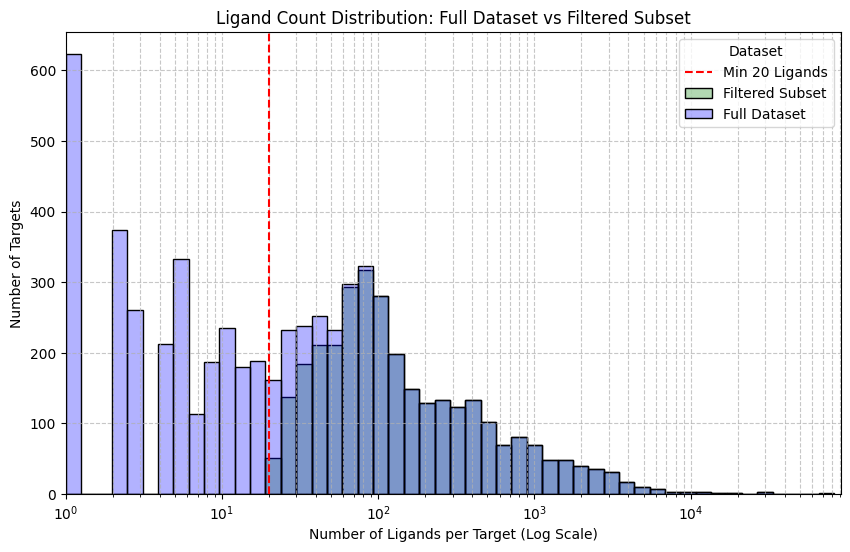

/tmp/ipykernel_389/3364888347.py:74: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 450)


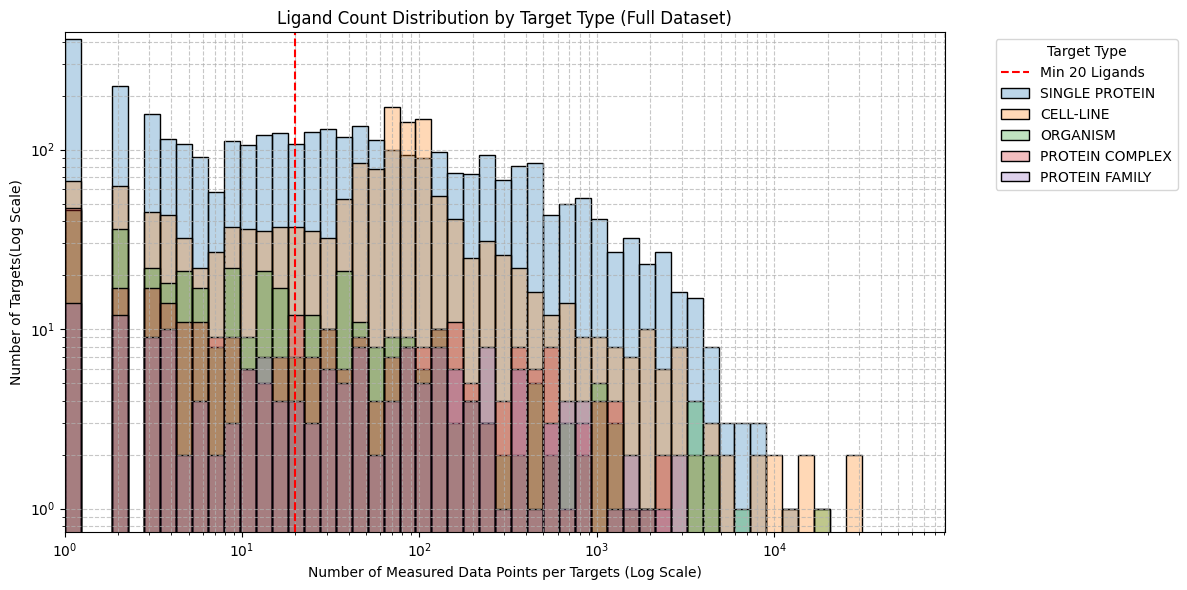

/tmp/ipykernel_389/3364888347.py:92: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 450)


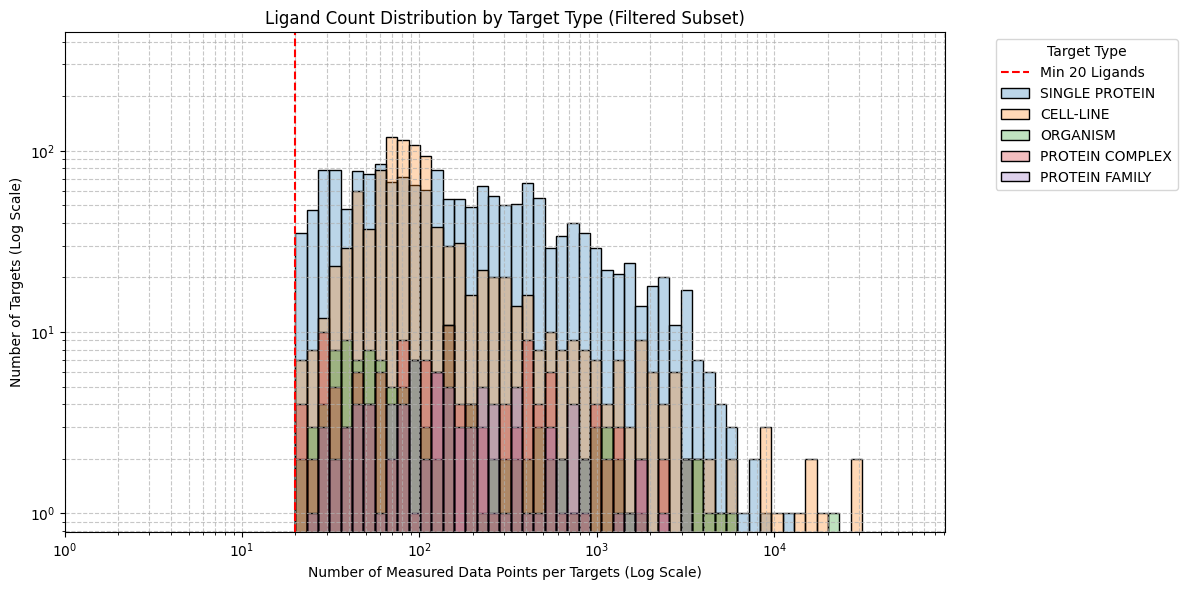

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据框已加载
# df_with_types 和 df2_with_types 已预定义
# 示例：
# df_with_types = pd.DataFrame({
#     'molregno': [...], 'canonical_smiles': [...], 'pref_name': [...],
#     'ic50': [...], 'pIC50': [...], 'units': [...], 'target_type': [...]
# })
# df2_with_types = pd.DataFrame({...})  # 已筛选过的 Filtered Subset

# 选择主要 target_type（前 5 种，基于 full dataset 的靶点数量）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
main_types_reversed = main_types.tolist()[::-1]  # 倒序
print(f"Selected target_types (reversed order) for visualization: {main_types_reversed}")

# 自定义高对比度颜色，确保区分
custom_palette = {
    'SINGLE PROTEIN': '#1f77b4',  # 深蓝色
    'CELL-LINE': '#ff7f0e',       # 橙色
    'ORGANISM': '#2ca02c',        # 绿色
    'PROTEIN COMPLEX': '#d62728',  # 红色
    'PROTEIN FAMILY': '#9467bd'    # 紫色
}

# 计算配体数量（去重，使用 nunique()）
full_counts = df_with_types.groupby(['pref_name', 'target_type'])['molregno'].nunique().reset_index(name='ligand_count')
full_counts['dataset'] = 'Full Dataset'
filtered_counts = df2_with_types.groupby(['pref_name', 'target_type'])['molregno'].nunique().reset_index(name='ligand_count')
filtered_counts['dataset'] = 'Filtered Subset'

# 合并数据以便整体图
overall_data = pd.concat([full_counts, filtered_counts])

# 计算横坐标范围（对数刻度）
all_ligand_counts = pd.concat([overall_data['ligand_count'], full_counts['ligand_count'], filtered_counts['ligand_count']])
x_min, x_max = all_ligand_counts.min(), all_ligand_counts.max()
x_min_log = max(1, x_min)  # 避免对数刻度下 0 或负值
x_max_log = x_max * 1.1  # 稍微扩大最大值范围


# 调试：打印数据范围和全局唯一化合物数量
print("Full Dataset targets:", full_counts['pref_name'].nunique())
print("Filtered Subset targets:", filtered_counts['pref_name'].nunique())
print("Full Dataset unique compounds (molregno):", df_with_types['molregno'].nunique())
print("Filtered Subset unique compounds (molregno):", df2_with_types['molregno'].nunique())
print("Full Dataset ligand_count range:", full_counts['ligand_count'].min(), full_counts['ligand_count'].max())
print("Filtered Subset ligand_count range:", filtered_counts['ligand_count'].min(), filtered_counts['ligand_count'].max())

# 图 1: 整体分布（不按 target_type 分组）
plt.figure(figsize=(10, 6))
sns.histplot(data=overall_data, x='ligand_count', hue='dataset', hue_order=['Full Dataset', 'Filtered Subset'], bins=50, log_scale=True, alpha=0.3, palette=['blue', 'green'])
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.xlabel('Number of Ligands per Target (Log Scale)')
plt.ylabel('Number of Targets')
plt.title('Ligand Count Distribution: Full Dataset vs Filtered Subset')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(title='Dataset', labels=['Min 20 Ligands', 'Filtered Subset', 'Full Dataset'])
#plt.legend(title='Dataset')  # 自动生成图例
plt.show()

# 图 2: Full Dataset 按 target_type 分组
plt.figure(figsize=(12, 6))
plt.yscale('log')
full_subset = df_with_types[df_with_types['target_type'].isin(main_types)]
full_counts_by_type = full_subset.groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')
full_counts_by_type = full_counts_by_type[full_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=full_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types_reversed, bins=50, log_scale=True, alpha=0.3, palette=custom_palette)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.ylim(0, 450)
plt.xlabel('Number of Measured Data Points per Targets (Log Scale)')
plt.ylabel('Number of Targets(Log Scale)')
plt.title('Ligand Count Distribution by Target Type (Full Dataset)')
plt.legend(title='Target Type', labels=['Min 20 Ligands']+ main_types.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 图 3: Filtered Subset 按 target_type 分组
plt.figure(figsize=(12, 6))
plt.yscale('log')
filtered_subset = df2_with_types[df2_with_types['target_type'].isin(main_types)]
filtered_counts_by_type = filtered_subset.groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')
filtered_counts_by_type = filtered_counts_by_type[filtered_counts_by_type['target_type'].isin(main_types)]  # 确保只包含主要类型
sns.histplot(data=filtered_counts_by_type, x='ligand_count', hue='target_type', hue_order=main_types_reversed, bins=50, log_scale=True, alpha=0.3, palette=custom_palette)
plt.axvline(x=20, color='red', linestyle='--', label='Min 20 Ligands')
plt.xlim(x_min_log, x_max_log)  # 统一横坐标范围
plt.ylim(0, 450)
plt.xlabel('Number of Measured Data Points per Targets (Log Scale)')
plt.ylabel('Number of Targets (Log Scale)')
plt.title('Ligand Count Distribution by Target Type (Filtered Subset)')
plt.legend(title='Target Type', labels=['Min 20 Ligands']+ main_types.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()

Distribution Range and Target Counts by Target Type:
                    min_ligands                  max_ligands               \
dataset         Filtered Subset Full Dataset Filtered Subset Full Dataset   
target_type                                                                 
CELL-LINE                    20            1           31217        31217   
ORGANISM                     22            1           20561        20561   
PROTEIN COMPLEX              20            1            2503         2503   
PROTEIN FAMILY               25            1            3124         3124   
SINGLE PROTEIN               20            1           11476        11476   

                    num_targets               
dataset         Filtered Subset Full Dataset  
target_type                                   
CELL-LINE                  1004         1541  
ORGANISM                    122          384  
PROTEIN COMPLEX             130          295  
PROTEIN FAMILY               87          170  
S

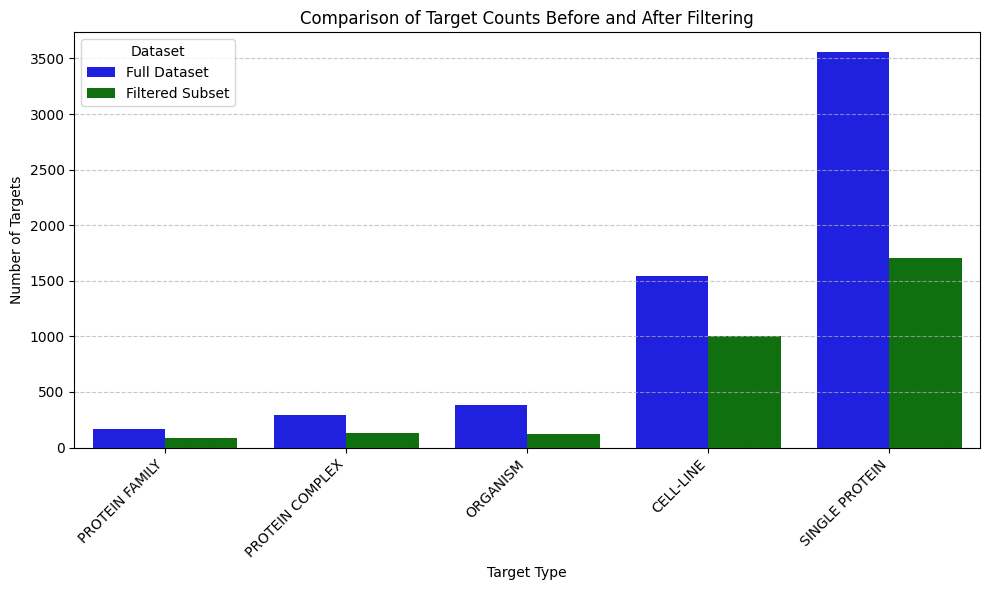

In [114]:
# 额外 Cell: 统计 target type 在筛选前后的分布范围和靶点数量，并可视化
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 选择主要 target_type（与之前一致）
main_types = df_with_types.groupby('target_type')['pref_name'].nunique().nlargest(5).index
main_types_reversed = main_types.tolist()[::-1]

# 计算 Full Dataset 的 ligand_count
full_counts_by_type = df_with_types[df_with_types['target_type'].isin(main_types)].groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')

# 计算 Filtered Subset 的 ligand_count
filtered_counts_by_type = df2_with_types[df2_with_types['target_type'].isin(main_types)].groupby(['target_type', 'pref_name'])['molregno'].nunique().reset_index(name='ligand_count')

# Full Dataset 的统计
full_counts_by_type_summary = full_counts_by_type.groupby('target_type')['ligand_count'].agg(['min', 'max', 'count']).reset_index()
full_counts_by_type_summary.columns = ['target_type', 'min_ligands', 'max_ligands', 'num_targets']
full_counts_by_type_summary['dataset'] = 'Full Dataset'

# Filtered Subset 的统计
filtered_counts_by_type_summary = filtered_counts_by_type.groupby('target_type')['ligand_count'].agg(['min', 'max', 'count']).reset_index()
filtered_counts_by_type_summary.columns = ['target_type', 'min_ligands', 'max_ligands', 'num_targets']
filtered_counts_by_type_summary['dataset'] = 'Filtered Subset'

# 合并统计结果
summary_data = pd.concat([full_counts_by_type_summary, filtered_counts_by_type_summary])

# 打印分布范围和靶点数量
print("Distribution Range and Target Counts by Target Type:")
print(summary_data.pivot(index='target_type', columns='dataset', values=['min_ligands', 'max_ligands', 'num_targets']))

# 可视化：筛选前后每个 target type 的靶点数量对比
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_data, x='target_type', y='num_targets', hue='dataset', palette=['blue', 'green'], order=main_types_reversed)
plt.xlabel('Target Type')
plt.ylabel('Number of Targets')
plt.title('Comparison of Target Counts Before and After Filtering')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')
plt.grid(True, axis='y', ls="--", alpha=0.7)
plt.tight_layout()
plt.show()